In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [19]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv("C:/Users/hp/Downloads/breast-cancer-wisconsin-data/data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
#Understand the target varibale further
df["diagnosis"].value_counts()

#Out of 569 patients, 357 had Benign and 212 had Malignant tumor

B    357
M    212
Name: diagnosis, dtype: int64

In [24]:
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values

In [7]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 33)


In [8]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Data visualization

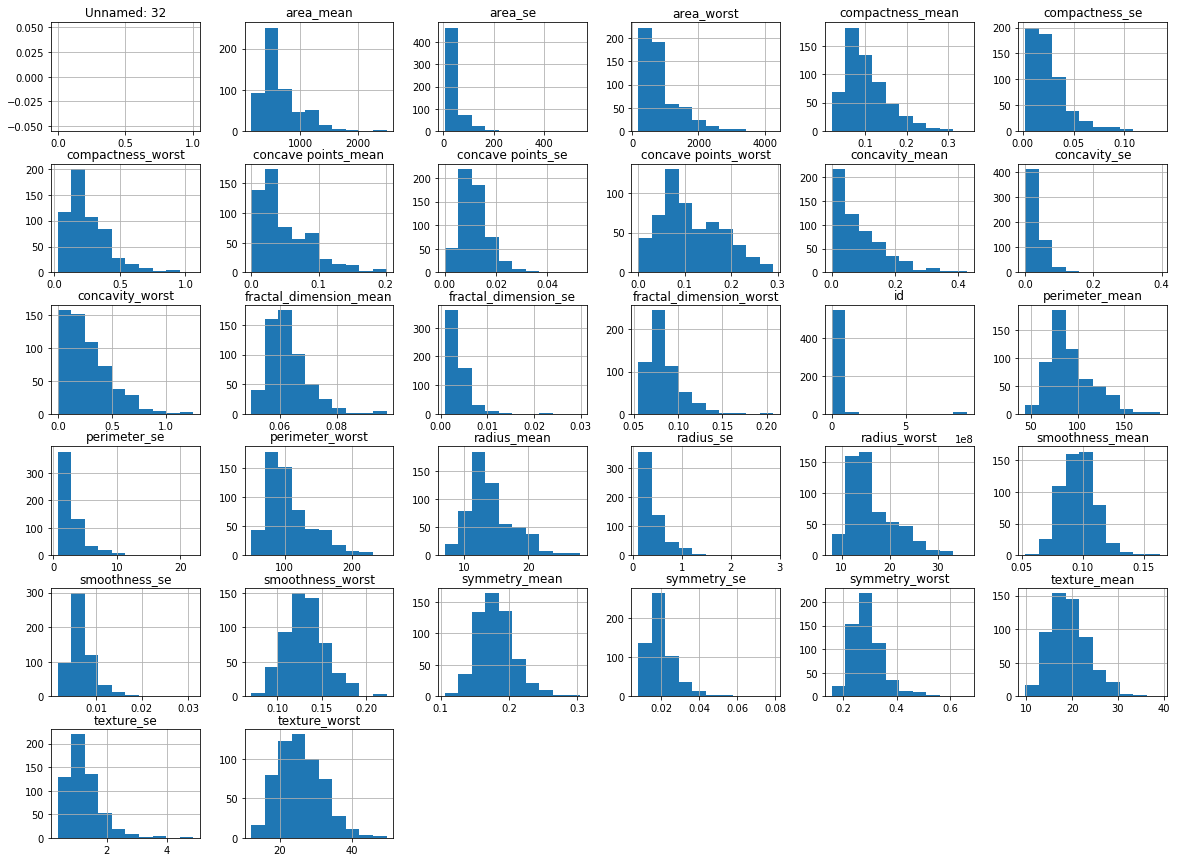

In [22]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [25]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


In [26]:
#Split the dataset into 75% train and 25% test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#### LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

classifier_1= LogisticRegression(random_state = 0)

#Train the model
classifier_1.fit(X_train, Y_train)

#Test it using the test dataset
Y_pred1 = classifier_1.predict(X_test)

0.958041958041958


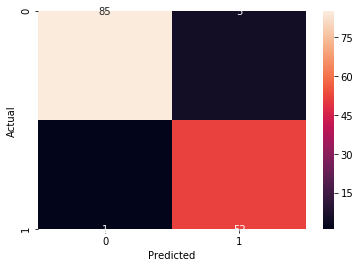

In [30]:
#Model Evaluation

print (accuracy_score(Y_test, Y_pred1))
confusion_matrix = pd.crosstab(Y_test, Y_pred1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### NEAREST NEIGHBOR

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_2.fit(X_train, Y_train)
Y_pred2 = classifier_2.predict(X_test)

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.9370629370629371


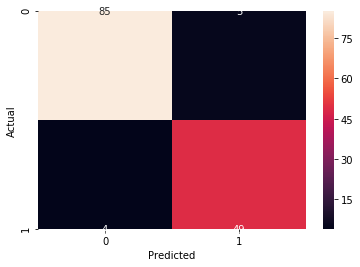

In [33]:
print (accuracy_score(Y_test, Y_pred2))
confusion_matrix = pd.crosstab(Y_test, Y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### SVM

In [34]:
from sklearn.svm import SVC
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_3.fit(X_train, Y_train)
Y_pred3 = classifier_3.predict(X_test)


0.965034965034965


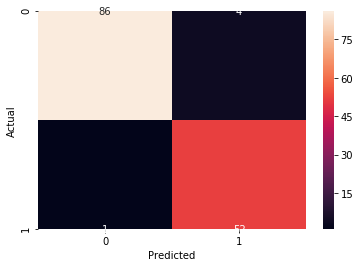

In [36]:
print (accuracy_score(Y_test, Y_pred3))
confusion_matrix = pd.crosstab(Y_test, Y_pred3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### KERNEL SVM

In [37]:
from sklearn.svm import SVC
classifier_4 = SVC(kernel = 'rbf', random_state = 0)
classifier_4.fit(X_train, Y_train)
Y_pred4 = classifier_4.predict(X_test)

0.6293706293706294


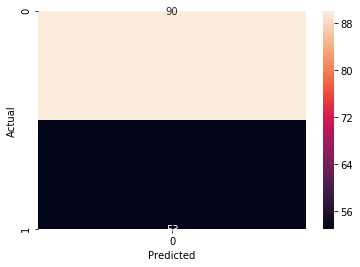

In [38]:
print (accuracy_score(Y_test, Y_pred4))
confusion_matrix = pd.crosstab(Y_test, Y_pred4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier_5 = GaussianNB()
classifier_5.fit(X_train, Y_train)
Y_pred5 = classifier_5.predict(X_test)

0.9370629370629371


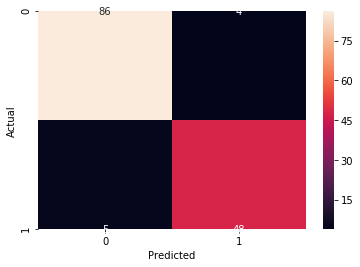

In [40]:
print (accuracy_score(Y_test, Y_pred5))
confusion_matrix = pd.crosstab(Y_test, Y_pred5, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### DECISION TREE ALGORITHM

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_6.fit(X_train, Y_train)
Y_pred6 = classifier_6.predict(X_test)

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.951048951048951


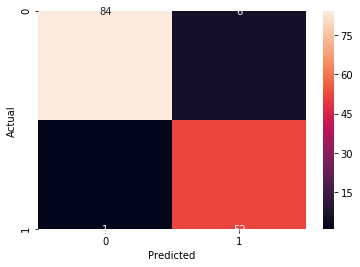

In [42]:
print (accuracy_score(Y_test, Y_pred6))
confusion_matrix = pd.crosstab(Y_test, Y_pred6, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### RANDOM FOREST CLASSIFICATION


In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier_7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_7.fit(X_train, Y_train)
Y_pred7 = classifier_7.predict(X_test)

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.965034965034965


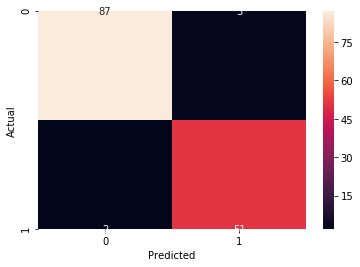

In [45]:
print (accuracy_score(Y_test, Y_pred7))
confusion_matrix = pd.crosstab(Y_test, Y_pred7, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)